In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

### Loading Data

In [2]:
jobs = pd.read_csv('./data/2019-03-15_jobs.csv', header = 0)

In [655]:
rejects = pd.read_csv('./data/2019-03-15_rejects.csv', header = 0)
reject_details = pd.read_csv('./data/2019-03-15_reject_details.csv', header = 0)
rejects = reject_details.merge(rejects.rename(columns = {'id': 'reject_id'}), on = 'reject_id', how = 'left')

In [919]:
# \s(\r\n|\r|\n)+
# [^,]\"[^,\s]
# \\\"(?<=[^,\s])
# , comma in Quotes "just passing time while I wait on my digivice.lso I'm trash so there's that."Just because you're trash, doesn't mean you can't do great things. It's called a garbage can, not a garbage cannot.\" - Oscar the grouch probably,robably not."

users = pd.read_csv('./data/2019-03-15_users.csv')

In [920]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12715 entries, 0 to 12714
Data columns (total 39 columns):
user_id                   12715 non-null int64
birthday                  12590 non-null object
gender                    12715 non-null object
photo_count               12715 non-null int64
profile_score             10288 non-null float64
profile_tier              10288 non-null object
bio                       1823 non-null object
characters                3273 non-null object
height                    12467 non-null float64
body_type                 12456 non-null object
blood_type                2945 non-null object
education                 12280 non-null object
school                    1010 non-null object
job                       12427 non-null object
company                   955 non-null object
religion                  12425 non-null object
smoking                   12421 non-null object
drinking                  12424 non-null object
region                    12478 n

### Feature

In [921]:
users = users.replace('NULL', np.nan)

In [922]:
users['birthday'] = pd.to_datetime(users.birthday, errors = 'coerce')

In [923]:
users['age'] = 2019 - pd.DatetimeIndex(users.birthday).year
users.loc[users.age >= 100, 'age'] = -1
users['age'] = users.age.fillna(-1)

In [924]:
users['account_created_day'] = pd.DatetimeIndex(users.account_created_at).day
users['account_created_weekday'] = pd.DatetimeIndex(users.account_created_at).weekday
users['account_created_hour'] = pd.DatetimeIndex(users.account_created_at).hour

In [926]:
users['created_to_confirm_seconds'] = (pd.DatetimeIndex(users.admin_confirmed_at) - pd.DatetimeIndex(users.account_created_at)).seconds
users['confirm_to_rating_seconds'] = (pd.DatetimeIndex(users.rating_completed_at) - pd.DatetimeIndex(users.admin_confirmed_at)).seconds
users['created_to_last_activity_days'] = (pd.DatetimeIndex(users.last_activity_at) - pd.DatetimeIndex(users.account_created_at)).days

In [927]:
user_jobs_count = users.job.value_counts()
user_jobs = user_jobs_count.index

In [928]:
uncategorized_jobs = []
categorized_jobs = []
for count, job in zip(user_jobs_count, user_jobs):
    if job.isnumeric():
        categorized_jobs.append((jobs.loc[jobs.id == int(job), 'job_name'].values[0], count))
    else:
        uncategorized_jobs.append(job.rstrip('</job>').lstrip('<job>'))

In [929]:
categorized_jobs[:10]

[('학생', 2368),
 ('회사원', 1589),
 ('없음', 913),
 ('준비 중', 806),
 ('아르바이트', 791),
 ('프리랜서', 598),
 ('자영업', 444),
 ('교육직', 314),
 ('서비스직', 274),
 ('사무직', 266)]

In [37]:
reject_counts = pd.DataFrame(rejects.groupby('user_id')['reject_id'].agg(len))
reject_counts = reject_counts.rename(columns = {'reject_id': 'reject_counts'}).reset_index()

In [39]:
users = users.merge(reject_counts, how = 'left', on = 'user_id')

In [40]:
users = users.astype({'age': 'int32', 'account_created_day': 'int32', 
                      'account_created_weekday': 'int32', 'account_created_hour': 'int32'}, errors = 'ignore')

In [236]:
bio_users = users.loc[users.bio.notnull()].user_id

In [241]:
with open('bio.text', 'w') as f:
    for b in pure_profiles.loc[pure_profiles.user_id.isin(bio_users)].bio:
        f.write(str(b) + '\n')

In [910]:
age_mask = (users.age >= 19) & (users.age <= 25)
len(users.loc[age_mask])

7618

In [911]:
len(users)

12715

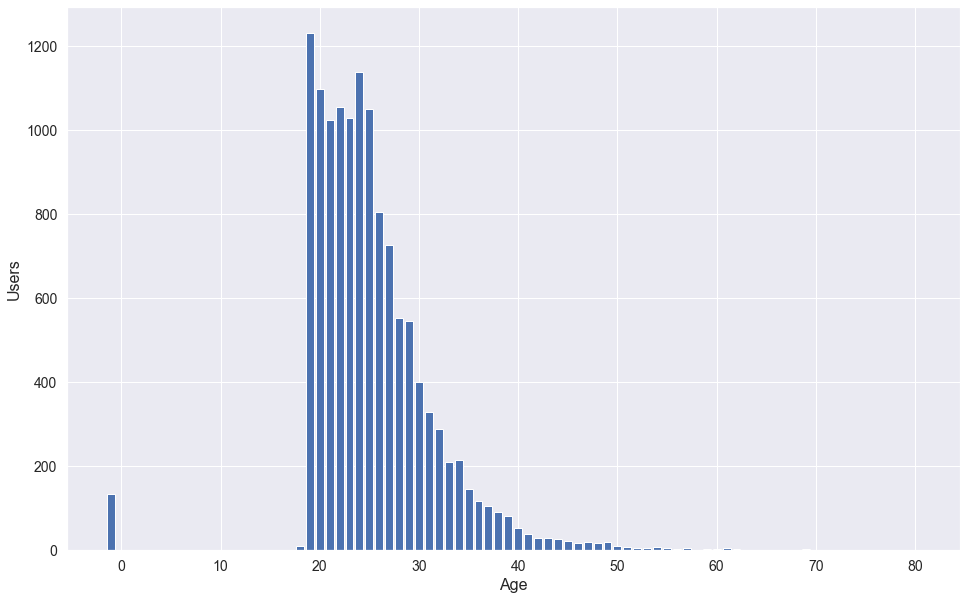

In [505]:
y = users.age.value_counts()
x = y.index

plt.bar(x, y)
plt.ylabel('Users', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('./image/age.png', dpi=300, bbox_inches='tight')
plt.show()

In [488]:
users.education.value_counts()

UE03    6248
UE01    2560
UE02    1937
UE06     996
UE04     479
UE05      60
Name: education, dtype: int64

In [44]:
users.profile_score.describe()

count    10288.000000
mean        68.274002
std         12.255224
min         31.570000
25%         59.775000
50%         69.310000
75%         77.045000
max        100.000000
Name: profile_score, dtype: float64

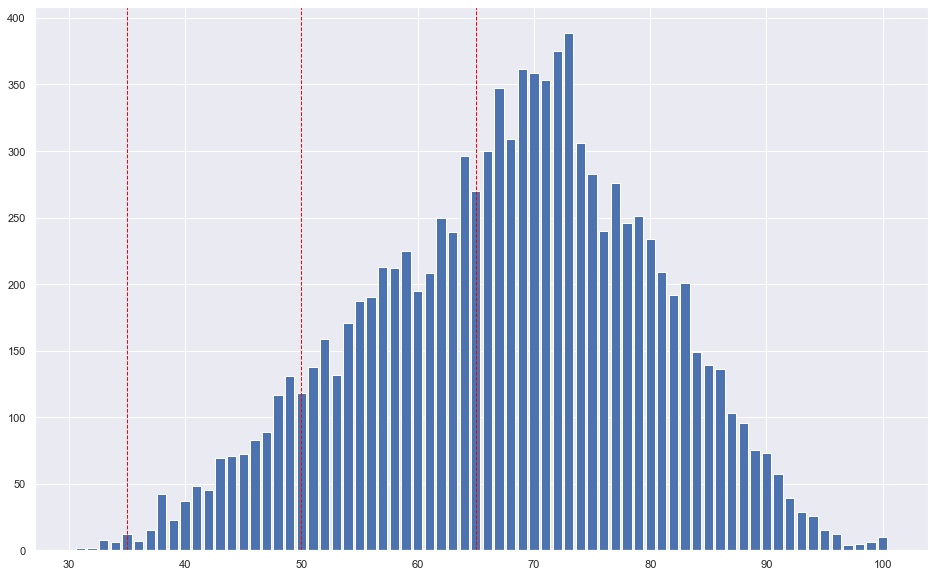

In [144]:
y = np.floor(users.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.show()

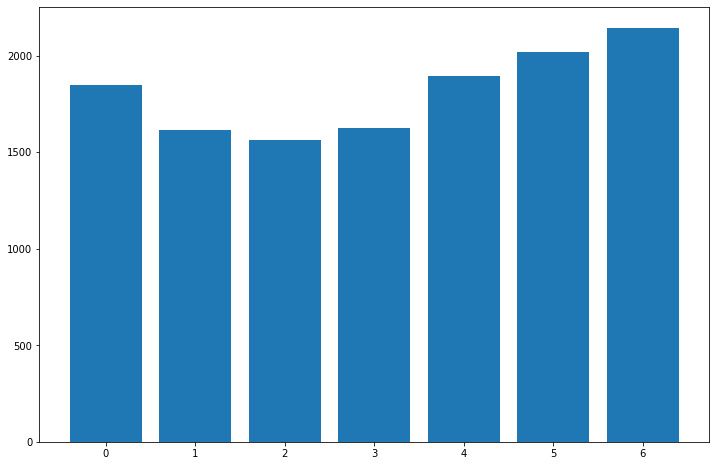

In [46]:
y = users.account_created_weekday.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [47]:
account_created_by_time = users.groupby(['account_created_weekday','account_created_hour'])['user_id'].agg(len).unstack().T
account_created_by_time.columns = ['M', 'Tu', 'W', 'Th', 'F', 'S', 'S']

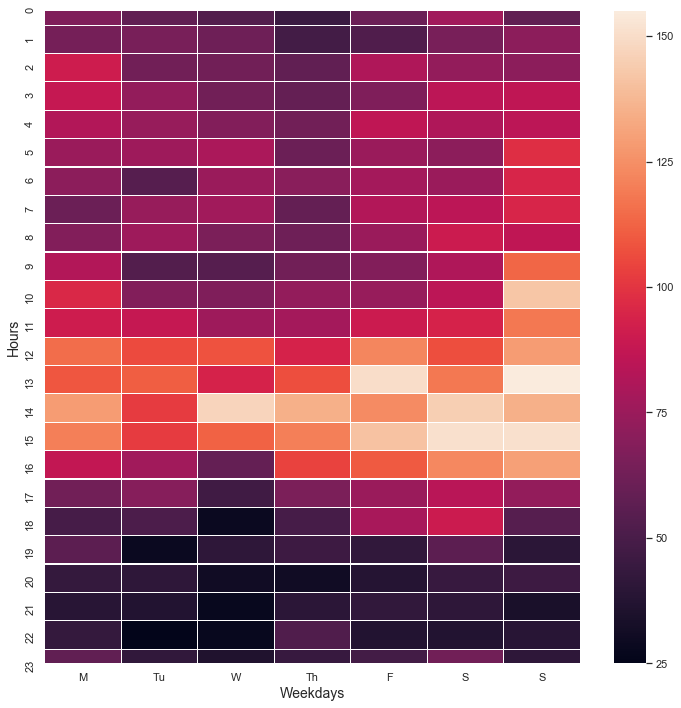

In [577]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(account_created_by_time, linewidth = 0.2)
plt.ylabel('Hours', fontsize = 14)
plt.xlabel('Weekdays', fontsize = 14)
plt.savefig('./image/creation_by_hours.png', dpi=300, bbox_inches='tight')
plt.show()
plt.rcParams['figure.figsize'] = [16, 10]

In [157]:
users[['photo_count', 'profile_score', 'height', 'age', 'reject_counts']].corr()

,photo_count,profile_score,height,age,reject_counts
photo_count,1.000000,-0.009683,0.012134,-0.001761,0.110478
profile_score,-0.009683,1.000000,0.022886,0.038608,-0.074604
height,0.012134,0.022886,1.000000,0.056473,-0.013313
age,-0.001761,0.038608,0.056473,1.000000,-0.044232
reject_counts,0.110478,-0.074604,-0.013313,-0.044232,1.000000


In [263]:
rejects

,reject_id,context,user_id,admin_id,rejected_at
0,956529358,picture_0,1867729,63,2019-02-21 15:10:14
1,956529358,picture_1,1867729,63,2019-02-21 15:10:14
2,956529364,picture_0,1867747,63,2019-02-21 15:16:29
3,956529364,picture_1,1867747,63,2019-02-21 15:16:29
4,956529449,height,1867983,63,2019-02-21 17:14:05
...,...,...,...,...,...
11005,956576379,picture_0,1920150,63,2019-03-14 14:41:27
11006,956576389,picture_0,1920150,63,2019-03-14 14:51:06
11007,956576389,picture_1,1920150,63,2019-03-14 14:51:06
11008,956576388,picture_1,1920161,63,2019-03-14 14:50:56


### Users

#### Attrition Profiles

In [611]:
# Attrition Profile
attrition_mask = (users.is_confirm.isna()) & (users.reject_counts.isna())
attrition_profiles = users.loc[attrition_mask]

In [621]:
attrition_profiles.stage.value_counts(normalize = True)

Picture         0.588452
Birthday        0.154791
Nickname        0.090909
Location        0.045455
MatchSetting    0.042998
Job             0.031941
Height          0.015971
Body            0.013514
Education       0.004914
Religion        0.004914
Drinking        0.003686
Smoking         0.002457
Name: stage, dtype: float64

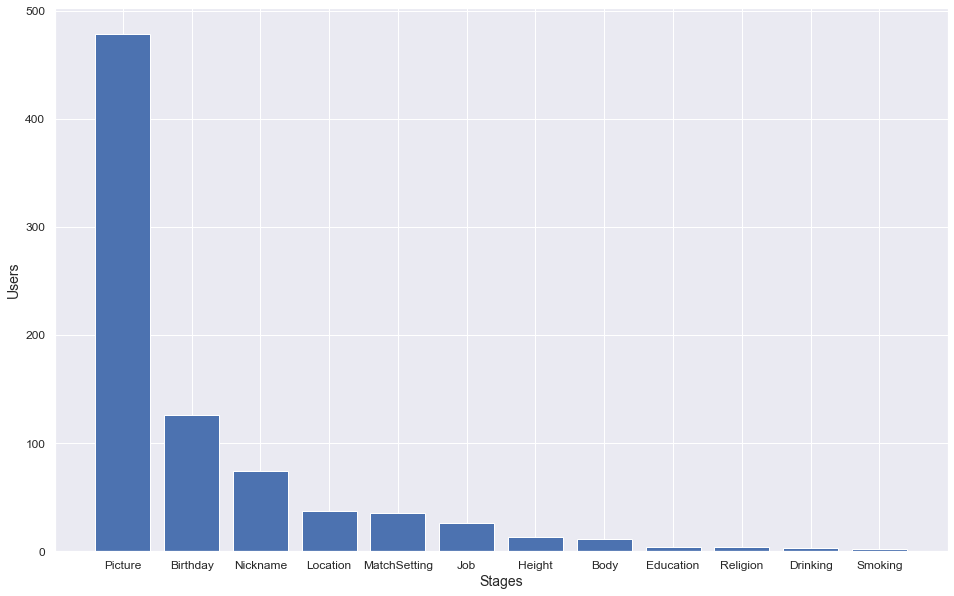

In [620]:
y = attrition_profiles.stage.value_counts()
x = y.index

plt.bar(x, y)
plt.xlabel('Stages', fontsize = 14)
plt.ylabel('Users', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('./image/frictions_by_stage.png', dpi = 300, bbox_inches='tight')
plt.show()

#### On Boarding Profiles

In [595]:
# On Boarding Profile
on_boarding_mask = (users.is_confirm.isna()) & (users.reject_counts.notnull())
on_boarding_profiles = users.loc[on_boarding_mask]

In [986]:
users.account_created_day.value_counts().sort_index()

1     657
2     670
3     654
4     640
5     553
6     575
7     587
8     600
9     761
10    794
11    636
12    537
13    405
14    324
21    160
22    640
23    590
24    697
25    571
26    524
27    584
28    556
Name: account_created_day, dtype: int64

In [985]:
on_boarding_profiles.account_created_day.value_counts().sort_index()

1     50
2     59
3     42
4     62
5     47
6     58
7     55
8     50
9     89
10    57
11    63
12    51
13    32
14    23
21     9
22    71
23    69
24    53
25    49
26    43
27    55
28    43
Name: account_created_day, dtype: int64

In [694]:
rejects.loc[rejects.user_id.isin(on_boarding_profiles.user_id)].groupby(['user_id', 'rejected_at'])['user_id'].agg(len).describe()

count    1974.000000
mean        2.257345
std         1.485403
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: user_id, dtype: float64

In [695]:
rejects.loc[rejects.user_id.isin(pure_profiles.user_id)].groupby(['user_id', 'rejected_at'])['user_id'].agg(len).describe()

count    3022.000000
mean        1.960291
std         1.244017
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: user_id, dtype: float64

In [982]:
rejects.loc[rejects.user_id.isin(on_boarding_profiles.user_id), 'context'].value_counts()

picture_1           1268
picture_0           1189
picture_2            772
picture_3            331
AMP005               273
picture_4            240
picture_5            183
height                90
birthday              38
AMP017                22
gender                20
nickname              14
single                 8
job                    6
사진도용은 가입이 불가능합니다       2
Name: context, dtype: int64

In [722]:
_picture = 0
_reject_count = rejects.loc[rejects.user_id.isin(on_boarding_profiles.user_id), 'context'].value_counts()
_cause = _reject_count.index
for cause, count in zip(_cause, _reject_count):
    if 'picture' in cause:
        _picture += count
print(_picture / sum(_reject_count))

0.893850987432675


#### Banned Profiles

In [284]:
pure_profiles.photo_count.value_counts()

3    2616
2    2279
6    2267
4    1585
5    1262
1       2
Name: photo_count, dtype: int64

In [58]:
# Banned Profile
banned_mask = (users.is_confirm == 'N')
banned_profiles = users.loc[banned_mask]

In [609]:
banned_profiles

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,stage,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_confirm_seconds,confirm_to_complete_seconds,reject_counts
6,1867739,2000-09-18,F,5,NaN,NaN,NaN,NaN,165.0,BF01,...,Review,2019-02-21 15:08:52,2019-02-22 16:28:34,19,21,3,15,403.0,86279.0,NaN
9,1867747,1999-06-30,F,6,NaN,NaN,NaN,NaN,154.0,BF02,...,Review,2019-02-21 15:19:14,2019-02-21 15:17:44,20,21,3,15,965.0,86031.0,2.0
45,1867863,1994-07-02,F,4,NaN,NaN,NaN,NaN,168.0,BF02,...,Review,2019-02-21 16:04:59,2019-02-21 16:12:13,25,21,3,16,98.0,0.0,NaN
63,1867943,1990-09-23,F,3,NaN,NaN,NaN,UC00|UC20|UC10,162.0,BF04,...,Review,2019-02-21 16:49:42,2019-02-28 13:47:11,29,21,3,16,796.0,86355.0,NaN
66,1867953,1994-09-25,F,3,NaN,NaN,NaN,NaN,160.0,BF01,...,Review,2019-02-21 16:45:00,2019-02-22 03:24:07,25,21,3,16,274.0,86260.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,1919533,1984-10-22,F,5,NaN,NaN,NaN,NaN,168.0,BF02,...,Review,2019-03-14 10:57:12,2019-03-14 10:49:02,35,14,3,10,543.0,86349.0,NaN
12585,1919641,2000-05-21,F,2,NaN,NaN,NaN,NaN,165.0,BF02,...,Review,2019-03-14 12:05:07,2019-03-15 00:44:23,19,14,3,11,2002.0,86300.0,1.0
12626,1919821,1992-04-26,F,2,NaN,NaN,NaN,NaN,178.0,BF05,...,Review,2019-03-14 22:03:44,2019-03-14 22:10:30,27,14,3,12,33671.0,86268.0,2.0
12638,1919861,2000-06-04,F,3,NaN,NaN,NaN,UC16|UC00|UC08,162.0,BF02,...,Review,2019-03-14 15:22:35,2019-03-14 23:10:01,19,14,3,13,8628.0,86254.0,4.0


In [274]:
banned_users = banned_profiles.loc[banned_profiles.reject_counts > 0, 'user_id']

In [278]:
rejects.loc[rejects.user_id.isin(banned_users)].groupby('context').agg(len)

,reject_id,user_id,admin_id,rejected_at
context,,,,
AMP005,101,101,101,101
AMP017,1,1,1,1
SNS 계정 기재,1,1,1,1
birthday,5,5,5,5
height,3,3,3,3
picture_0,62,62,62,62
picture_1,84,84,84,84
picture_2,116,116,116,116
picture_3,21,21,21,21


#### Confirmed Profiles

In [59]:
# Confirmed Profile
confirmed_mask = (users.is_confirm == 'Y')
confirmed_profiles = users.loc[confirmed_mask]

#### Blocked Profiles

In [61]:
# Blocked Profile
blocked_mask = (users.is_confirm == 'Y') & (users.is_blocked == 'Y') 
blocked_profiles = users.loc[blocked_mask]

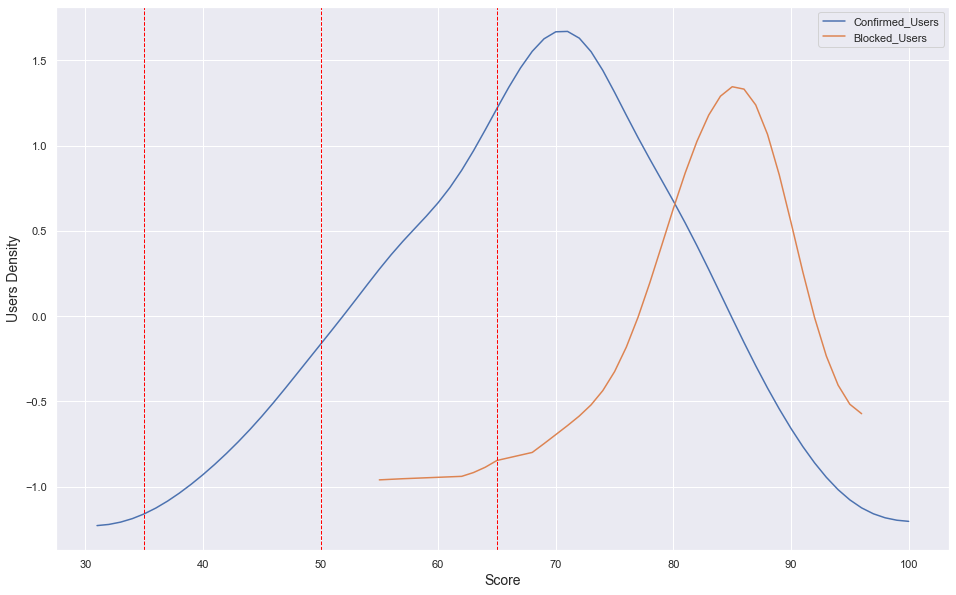

In [815]:
from scipy.ndimage import gaussian_filter1d

def draw_scaled_graph(groups):
    
    for group in groups:
        y = np.floor(group.profile_score).value_counts().sort_index()
        x = y.index
        
        y = gaussian_filter1d(preprocessing.scale(y), sigma = 3)
        plt.plot(x, y)
        
    plt.xlabel('Score', fontsize = 14)
    plt.ylabel('Users Density', fontsize = 14)
    plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
    plt.legend([group.name for group in groups])
    plt.savefig('./image/profile_score_distribution_comparison.png', dpi = 300, bbox_inches='tight')
    plt.show()

confirmed_profiles.name = 'Confirmed_Users'
blocked_profiles.name = 'Blocked_Users'

groups = [confirmed_profiles, blocked_profiles]
draw_scaled_graph(groups)

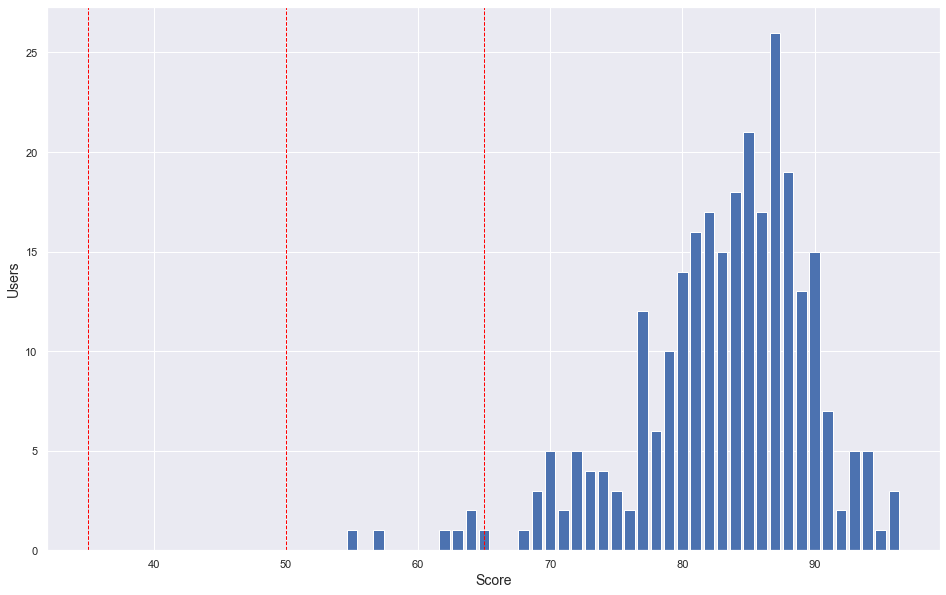

In [767]:
y = np.floor(blocked_profiles.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Users', fontsize = 14)
plt.savefig('./image/blocked_users_profile_score_distribution.png', dpi = 300, bbox_inches='tight')
plt.show()

In [823]:
pure_profiles.profile_score.describe()

count    10010.000000
mean        67.848146
std         12.099423
min         31.570000
25%         59.462500
50%         68.865000
75%         76.277500
max        100.000000
Name: profile_score, dtype: float64

In [824]:
blocked_profiles.profile_score.describe()

count    278.000000
mean      83.607878
std        6.731312
min       55.790000
25%       80.322500
50%       84.840000
75%       87.995000
max       96.640000
Name: profile_score, dtype: float64

In [821]:
with open('blocked_bio.txt', 'w') as f:
    for text in blocked_profiles.loc[blocked_profiles.bio.notnull(),'bio'].values:
        f.write(str(text) + '\n')

In [819]:
blocked_profiles.loc[blocked_profiles.bio.notnull(), 'bio'].values

array(['혼자사는데   저랑 술친구 밥친구 톡친구 해요  카톡T886',
       '좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~',
       '앱 자주안해서  카톡로 대화할까요 ? 카톡 :T886', '나이 상관없이 저랑 친구 하실분요\nㄲㅑ 똑: ttu8',
       '톡 친구 밥친구 술친구 하실분  같이드라이브해도 좋아해요 카톡 :T886',
       '좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~', '친하게지낼분~~톡남길께여~ 톡’일구구오팔팔’',
       "같이 톡하면서 놀아여~톡'일구구오팔팔'", '좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~',
       '일땜에 앱확인잘못해요   편하게  톡 으로 연락 주고 받을수 잇으면 199388부담업이 연락주세요',
       '나이 상관없이 저랑 친구 하실래요?\nㄲㅑ 똑: ttu8', '어필사진에 연락처있어요',
       '매력어필사진에 연락처있어요', '좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~',
       '어플자주안하는데   카톡대화 할까요 ?  아이디 T886\n좋은분과  좋은인연 바래요',
       'ㅎㅇ 저는 여자를 위해줄주 아는 분이 좋아요\nㄲㅑ 똑:ttu8',
       '시간 괜찮으시면 편하게 술한잔 하실래요^똑 mm668연락줘용^^',
       '주말 같이 보내요\n카.톡: ｎｎｙ３３ 연락주세요~', '^똑 엠엠668연락줘용^^',
       '저랑 술친구 밥친구 톡친구 하실분  카톡 :T886', '주말인데  심심하요  뭘하면되죠  ? 카톡 T886',
       '매너잇고.   맘통하눈분하고.   대화나누고 싶네요앱은바루바루 확인이 어려워서요  잘못하고잇어요 ㅋ ㅏ토 ㄱ 으로 편하게 대화가능하시면①⑨⑨③⑧⑧ 이구요  좋은인연으로 오랫동안 연락원해요    .',
       '나이상관없이  저랑친구하실분  카톡 :T886  툭주세요', '나이 상관없이 저랑 친구 하실래요ㅋ툑

#### Pure Profiles

In [115]:
pure_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna())
pure_profiles = users.loc[pure_mask]

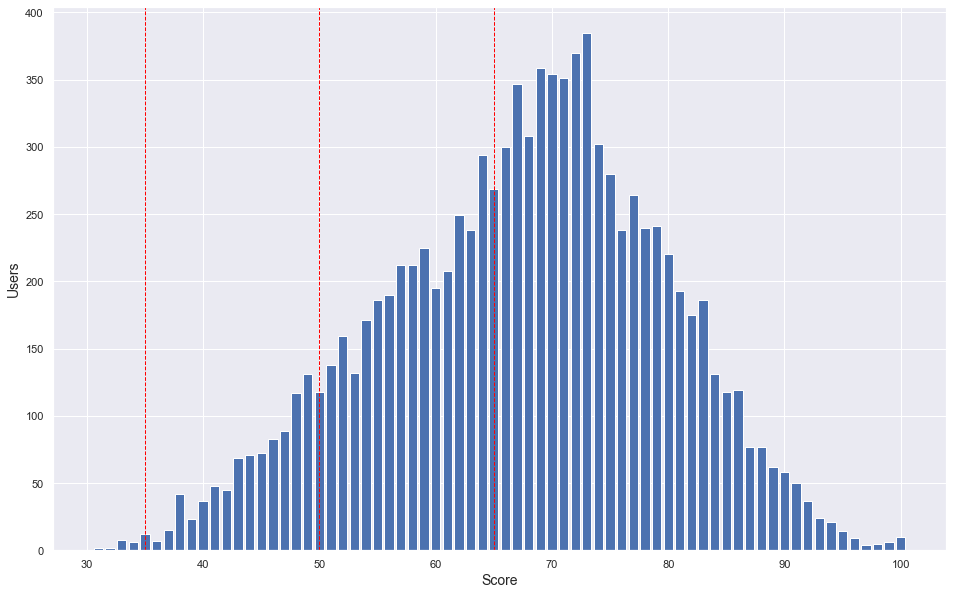

In [826]:
y = np.floor(pure_profiles.profile_score).value_counts().sort_index()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Users', fontsize = 14)
plt.savefig('./image/pure_profiles_score_distribution.png', dpi = 300, bbox_inches='tight')
plt.show()

In [890]:
pure_profiles.loc[pure_profiles.reject_counts.notnull()].groupby('profile_tier')['created_to_confirm_seconds'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,1154.0,5232.650780,13927.088636,66.0,633.00,969.0,1890.0,86067.0
Gold,637.0,4686.803768,12601.645808,187.0,609.00,1003.0,1877.0,83238.0
Silver,218.0,4219.059633,11847.191890,228.0,570.75,907.5,1928.0,82217.0
Bronze,6.0,2858.500000,2670.183271,650.0,1178.50,1854.5,3513.0,7773.0


In [940]:
pure_profiles.groupby('profile_tier')['confirm_to_rating_seconds'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,6204.0,316.668117,709.037138,30.0,65.0,94.0,377.25,20361.0
Gold,2927.0,425.669969,794.084044,31.0,70.0,121.0,689.50,18040.0
Silver,861.0,782.164925,899.068115,31.0,232.0,704.0,827.00,7824.0
Bronze,18.0,714.888889,89.089439,604.0,629.5,693.5,793.75,881.0


In [128]:
pure_profiles.groupby('account_created_hour')['confirm_to_rating_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
account_created_hour,,,,,,,,
0,338.0,605.668639,1203.437614,51.0,100.00,626.0,801.00,20361.0
1,353.0,515.614731,644.422895,59.0,89.00,200.0,775.00,5584.0
2,396.0,481.275253,955.934192,44.0,75.00,129.5,758.50,15352.0
3,407.0,466.336609,809.886018,43.0,70.00,124.0,729.00,10426.0
4,453.0,484.322296,686.242232,47.0,83.00,140.0,729.00,7610.0
5,464.0,372.409483,431.532885,42.0,79.00,117.0,705.25,2752.0
6,422.0,429.123223,652.899332,41.0,77.00,116.0,721.00,5533.0
7,413.0,471.874092,1017.876003,49.0,74.00,101.0,633.00,7877.0
8,368.0,426.665761,911.708104,37.0,73.00,98.5,660.00,6046.0


In [414]:
pure_profiles.groupby('account_created_hour')['created_to_confirm_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
account_created_hour,,,,,,,,
0,338.0,2289.310651,7726.992025,90.0,256.00,384.0,657.00,73116.0
1,353.0,1669.515581,6902.098137,115.0,250.00,352.0,634.00,84880.0
2,396.0,1465.227273,6082.249117,117.0,257.75,370.5,650.25,82195.0
3,407.0,1606.980344,5984.319264,120.0,267.50,389.0,725.00,80097.0
4,453.0,1484.657837,6542.220210,109.0,294.00,408.0,658.00,76694.0
5,464.0,1252.730603,4768.447852,129.0,289.75,420.0,644.50,69620.0
6,422.0,2248.978673,8856.515259,102.0,299.00,445.0,759.00,80706.0
7,413.0,2137.508475,9142.310797,114.0,293.00,443.0,659.00,80376.0
8,368.0,1375.907609,5867.608358,109.0,289.00,446.5,732.25,85126.0


In [975]:
pure_profiles[['confirm_to_rating_seconds', 'profile_score']].corr()

,confirm_to_rating_seconds,profile_score
confirm_to_rating_seconds,1.000000,-0.152095
profile_score,-0.152095,1.000000


In [980]:
pure_profiles.groupby('account_created_hour')['created_to_last_activity_days'].describe()

,count,mean,std,min,25%,50%,75%,max
account_created_hour,,,,,,,,
0,338.0,4.396450,5.724350,0.0,0.0,2.0,7.00,21.0
1,353.0,4.297450,5.503555,0.0,0.0,2.0,7.00,21.0
2,396.0,4.126263,5.509414,0.0,0.0,1.0,6.25,21.0
3,407.0,3.820639,5.284960,0.0,0.0,1.0,5.00,21.0
4,453.0,3.690949,4.985983,0.0,0.0,1.0,6.00,21.0
5,464.0,3.797414,5.100916,0.0,0.0,1.0,6.00,21.0
6,422.0,3.928910,5.208678,0.0,0.0,1.0,6.00,21.0
7,413.0,4.288136,5.386227,0.0,0.0,2.0,7.00,21.0
8,368.0,4.480978,5.436246,0.0,0.0,2.0,7.25,20.0


In [344]:
pure_profiles.groupby('profile_tier')['created_to_last_activity_days'].describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,6204.0,4.252901,5.322127,0.0,0.0,2.0,7.0,21.0
Gold,2927.0,3.574650,5.023847,0.0,0.0,1.0,5.0,21.0
Silver,861.0,2.594657,4.404746,0.0,0.0,0.0,3.0,21.0
Bronze,18.0,0.888889,2.609685,0.0,0.0,0.0,0.0,11.0


In [345]:
tier_mask = (pure_profiles.profile_tier == 'Diamond') | (pure_profiles.profile_tier == 'Gold')
dia_gold = pure_profiles.loc[tier_mask]

In [350]:
dia_gold.profile_score.describe()

count    9131.000000
mean       70.058493
std        10.164551
min        50.000000
25%        62.515000
50%        70.160000
75%        77.230000
max       100.000000
Name: profile_score, dtype: float64

In [359]:
# new_gold = 50 - 70
new_gold = pure_profiles.loc[(pure_profiles.profile_score >= 50) & (pure_profiles.profile_score < 70.16)]
new_dia = pure_profiles.loc[pure_profiles.profile_score >= 70.16]

In [339]:
pure_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.619780
Gold       0.292408
Silver     0.086014
Bronze     0.001798
Name: profile_tier, dtype: float64

In [337]:
pure_profiles.loc[pure_profiles.stage_updated_at > pure_profiles.last_activity_at, 'profile_tier'].value_counts(normalize = True)

Diamond    0.406061
Gold       0.375758
Silver     0.212121
Bronze     0.006061
Name: profile_tier, dtype: float64

한국인은 bio를 안쓰는 경향이 있음(비교적)

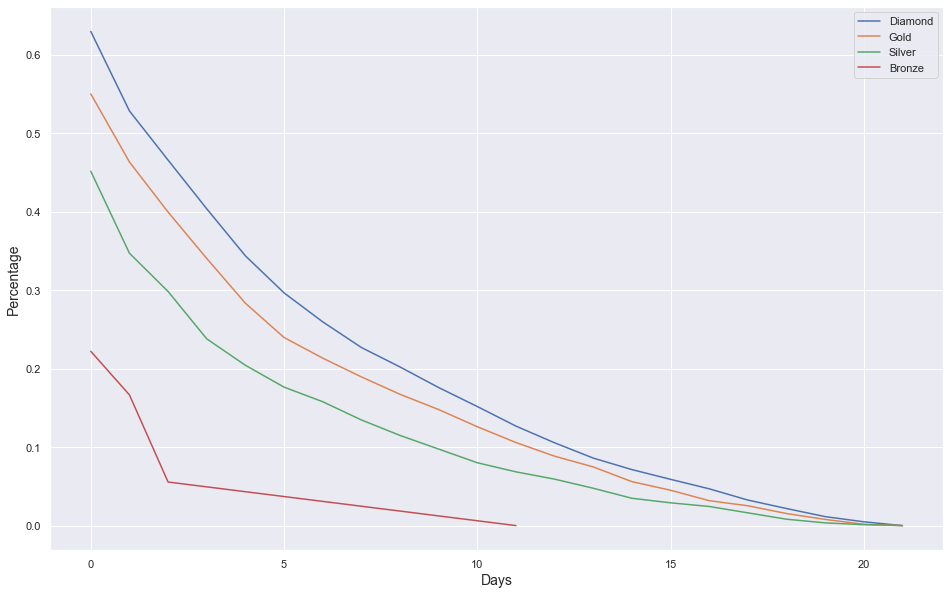

In [917]:
tiers = ['Diamond', 'Gold', 'Silver', 'Bronze']

for tier in tiers:
    maintained_users = pure_profiles.loc[pure_profiles.profile_tier == tier, 'created_to_last_activity_days'].value_counts().sort_index()
    days = maintained_users.index
    
    total_users = sum(maintained_users)
    accumulated_dropped_users = 0
    y = []
    
    for day, user in zip(days, maintained_users):
        accumulated_dropped_users += user
        y.append(1- accumulated_dropped_users / total_users)
    plt.plot(days, y)

plt.legend(tiers)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.savefig('./image/drop_rate_by_tier.png', dpi = 300, bbox_inches='tight')
plt.show()

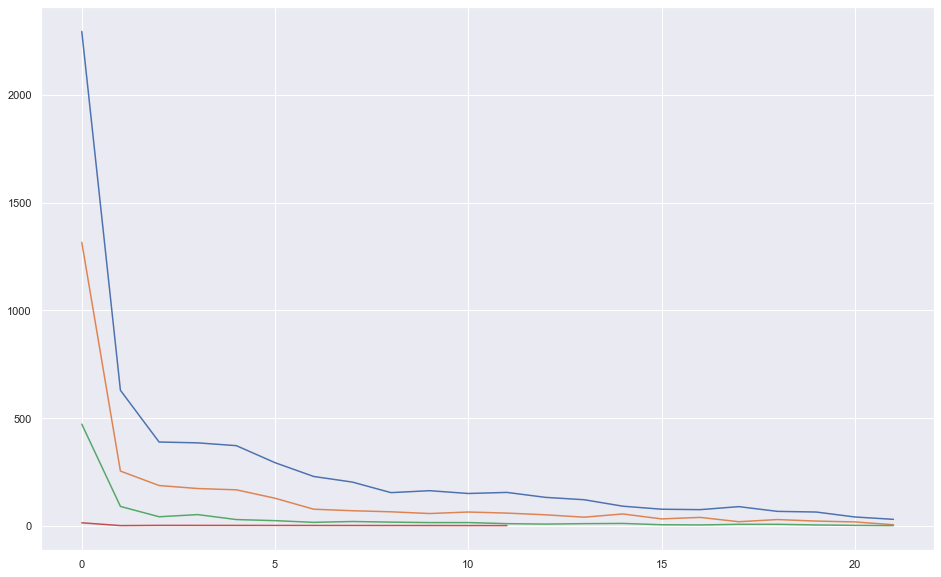

In [832]:
tiers = ['Diamond', 'Gold', 'Silver', 'Bronze']

for tier in tiers:
    
    y = pure_profiles.loc[pure_profiles.profile_tier == tier, 'created_to_last_activity_days'].value_counts().sort_index()
    x = y.index
    
    plt.plot(x, y)
plt.show()

#### Deactivated Profiles

In [136]:
deactivated_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_deactivated == 'Y')
deactivated_profiles = users.loc[deactivated_mask]

#### Turn Over Profiles

In [137]:
turn_over_mask = ((users.is_confirm == 'Y') & (users.is_blocked.isna())) & ((users.is_deactivated == 'Y') | (users.is_out == 'Y'))
turn_over_profiles = users.loc[turn_over_mask]

In [105]:
pure_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.619780
Gold       0.292408
Silver     0.086014
Bronze     0.001798
Name: profile_tier, dtype: float64

In [138]:
turn_over_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.601689
Gold       0.306855
Silver     0.090156
Bronze     0.001300
Name: profile_tier, dtype: float64

#### Active Profiles

In [139]:
active_mask = (users.is_out == 'N') & (users.is_deactivated == 'N') & (users.is_confirm == 'Y') & (users.is_blocked != 'Y')
active_profiles = users.loc[active_mask]

In [140]:
active_profiles.created_to_confirm_seconds.describe()

count     3854.000000
mean      2730.092631
std      10053.708125
min        100.000000
25%        297.000000
50%        453.500000
75%        804.750000
max      86067.000000
Name: created_to_confirm_seconds, dtype: float64

In [482]:
pd.to_datetime('3/9/19 14:00')

Timestamp('2019-03-09 14:00:00')

In [486]:
len(active_profiles)

3854

In [989]:
date_mask = (pd.DatetimeIndex(active_profiles.account_created_at) < pd.to_datetime('3/9/19 15:00'))
active_profiles.loc[date_mask,'account_created_at']

5       2019-02-21 15:03:45
16      2019-02-21 15:22:44
17      2019-02-21 15:23:50
18      2019-02-21 15:24:22
23      2019-02-21 15:37:23
               ...         
9739    2019-03-09 14:51:06
9741    2019-03-09 14:52:35
9742    2019-03-09 14:52:49
9745    2019-03-09 14:56:20
9748    2019-03-09 14:58:19
Name: account_created_at, Length: 2279, dtype: object